<a href="https://colab.research.google.com/github/tammE6/Capstone-Bella-beats/blob/main/Bellabeat_Case_Study_Data_Visualizations_(Python_Code).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generating Visualizations...


/tmp/ipython-input-1-1261537616.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_steps_per_user.index, y=average_steps_per_user.values, palette='viridis')


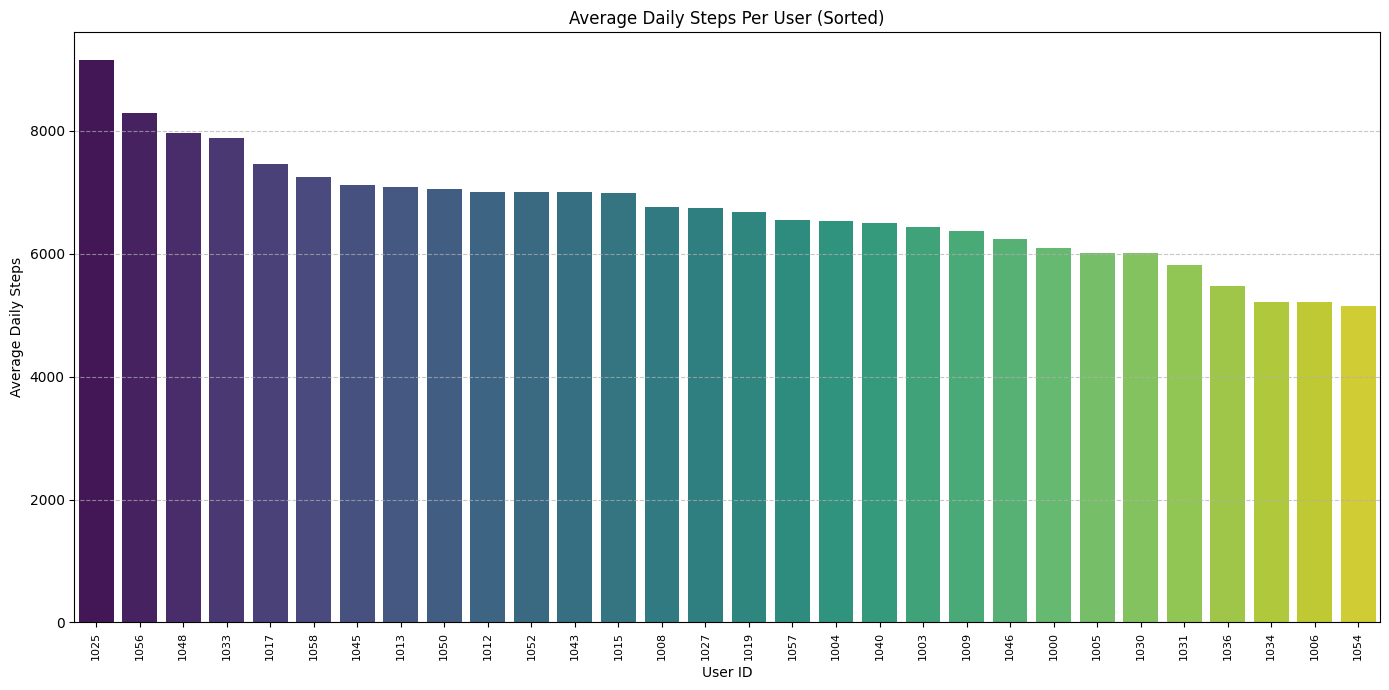

Bar chart of average steps per user generated.


/tmp/ipython-input-1-1261537616.py:84: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


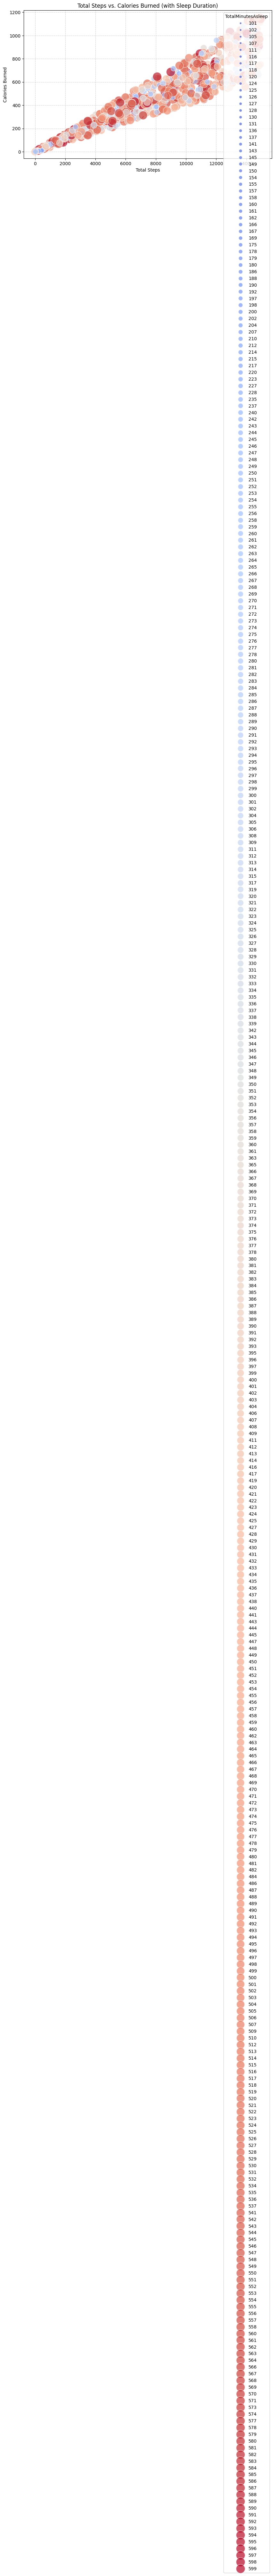

Scatter plot of steps vs. calories burned generated.


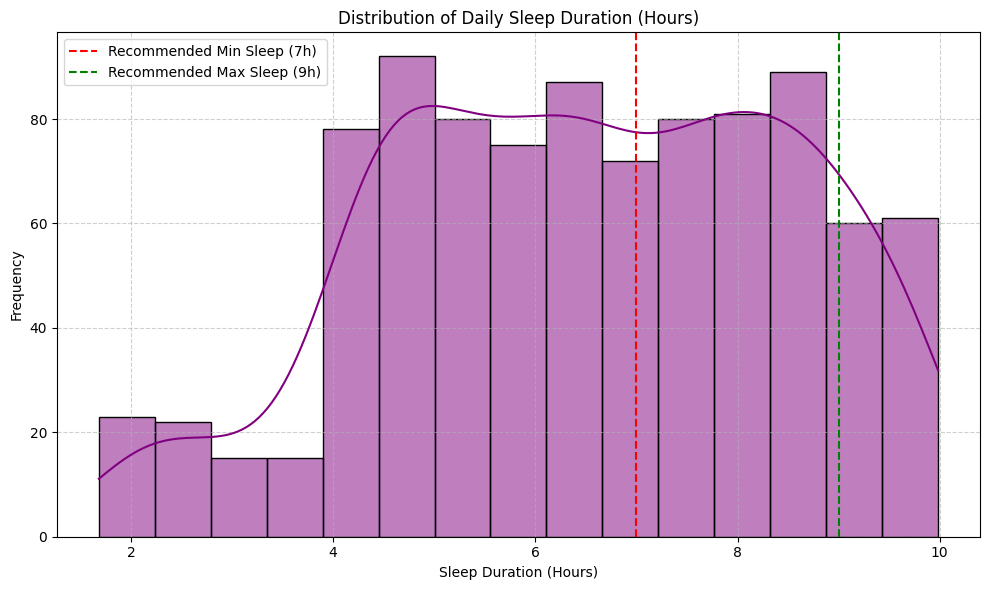

Histogram of sleep duration generated.


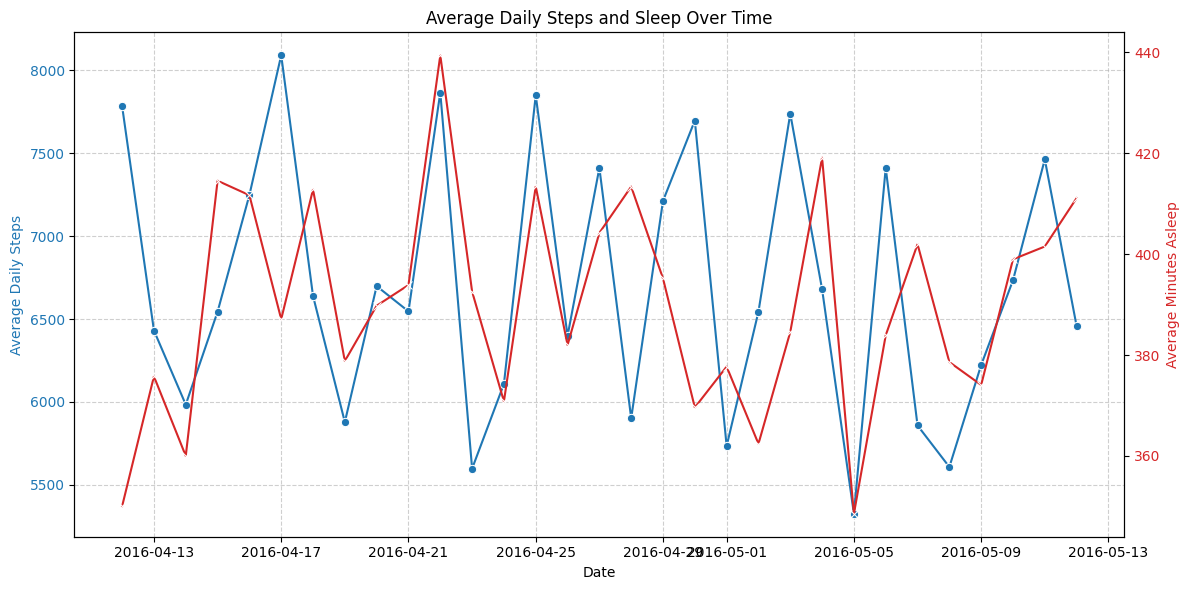

Line graph of daily steps and sleep over time generated.

All requested visualizations have been generated (or synthetic data used for demonstration).
Remember to replace the synthetic data block with your actual loaded and processed Bellabeat data.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # For creating sample data

# --- Important: Replace this with your actual cleaned and merged data ---
# Load your daily activity data. Make sure 'Id' is the user ID and 'ActivityDate' is a datetime object.
# Example:
# daily_activity_df = pd.read_csv('dailyActivity_merged.csv')
# daily_activity_df['ActivityDate'] = pd.to_datetime(daily_activity_df['ActivityDate'])
# sleep_df = pd.read_csv('sleepDay_merged.csv')
# sleep_df['SleepDay'] = pd.to_datetime(sleep_df['SleepDay'])

# Assuming you have a merged DataFrame from your 'Process' step
# For demonstration, I'll create a synthetic DataFrame that mimics the structure
# You should load your 'merged_bellabeat_data.csv' or equivalent
# merged_data = pd.read_csv('merged_bellabeat_data.csv')
# merged_data['ActivityDate'] = pd.to_datetime(merged_data['ActivityDate'])

# --- Synthetic Data for Demonstration (REMOVE THIS BLOCK WHEN USING YOUR REAL DATA) ---
np.random.seed(42) # for reproducibility
num_users = 30
num_days = 31
user_ids = [str(i) for i in np.random.choice(range(1000, 1000 + num_users * 2), num_users, replace=False)]
start_date = pd.to_datetime('2016-04-12')
dates = pd.to_timedelta(np.arange(num_days), unit='D') + start_date

data = []
for uid in user_ids:
    for date in dates:
        total_steps = np.random.randint(0, 15000)
        calories = total_steps * np.random.uniform(0.04, 0.08) # Approx 0.04-0.08 calories/step
        total_minutes_asleep = np.random.randint(240, 600) # 4-10 hours sleep

        # Introduce some 'inactive' users or days for demonstration
        if np.random.rand() < 0.1: # 10% chance of very low activity
            total_steps = np.random.randint(0, 500)
            calories = total_steps * np.random.uniform(0.02, 0.03)
            total_minutes_asleep = np.random.randint(100, 300)

        data.append({
            'Id': uid,
            'ActivityDate': date,
            'TotalSteps': total_steps,
            'Calories': calories,
            'TotalMinutesAsleep': total_minutes_asleep
        })

merged_data = pd.DataFrame(data)
# --- END OF SYNTHETIC DATA BLOCK ---


# Ensure ActivityDate is datetime and set as index for time series plot
merged_data['ActivityDate'] = pd.to_datetime(merged_data['ActivityDate'])
# Create a 'DayOfWeek' column for easier analysis
merged_data['DayOfWeek'] = merged_data['ActivityDate'].dt.day_name()


print("Generating Visualizations...")

# --- 1. Bar chart of average steps per user ---
# Group by Id and calculate mean steps for each user
average_steps_per_user = merged_data.groupby('Id')['TotalSteps'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 7))
sns.barplot(x=average_steps_per_user.index, y=average_steps_per_user.values, palette='viridis')
plt.title('Average Daily Steps Per User (Sorted)')
plt.xlabel('User ID')
plt.ylabel('Average Daily Steps')
plt.xticks(rotation=90, fontsize=8) # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print("Bar chart of average steps per user generated.")


# --- 2. Scatter plot of steps vs. calories burned ---
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='TotalSteps', y='Calories', alpha=0.7, hue='TotalMinutesAsleep', size='TotalMinutesAsleep', sizes=(20, 400), palette='coolwarm', legend='full')
plt.title('Total Steps vs. Calories Burned (with Sleep Duration)')
plt.xlabel('Total Steps')
plt.ylabel('Calories Burned')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
print("Scatter plot of steps vs. calories burned generated.")


# --- 3. Histogram of sleep duration ---
# Convert TotalMinutesAsleep to hours for better readability
merged_data['TotalHoursAsleep'] = merged_data['TotalMinutesAsleep'] / 60

plt.figure(figsize=(10, 6))
sns.histplot(data=merged_data, x='TotalHoursAsleep', bins=15, kde=True, color='purple')
plt.title('Distribution of Daily Sleep Duration (Hours)')
plt.xlabel('Sleep Duration (Hours)')
plt.ylabel('Frequency')
plt.axvline(x=7, color='red', linestyle='--', label='Recommended Min Sleep (7h)')
plt.axvline(x=9, color='green', linestyle='--', label='Recommended Max Sleep (9h)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
print("Histogram of sleep duration generated.")


# --- 4. Line graph showing daily steps and sleep over time (Aggregated Average) ---
# Aggregate data by date to show overall trends (average across all users for each day)
daily_average_trends = merged_data.groupby('ActivityDate').agg({
    'TotalSteps': 'mean',
    'TotalMinutesAsleep': 'mean'
}).reset_index()

# Melt the DataFrame for Seaborn lineplot if needed, or plot two lines
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Daily Steps', color=color)
sns.lineplot(x='ActivityDate', y='TotalSteps', data=daily_average_trends, color=color, ax=ax1, marker='o')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Average Daily Steps and Sleep Over Time')
ax1.grid(True, linestyle='--', alpha=0.6)

ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Average Minutes Asleep', color=color) # we already calculated in hours, use minutes here
sns.lineplot(x='ActivityDate', y='TotalMinutesAsleep', data=daily_average_trends, color=color, ax=ax2, marker='x')
ax2.tick_params(axis='y', labelcolor=color)

plt.tight_layout()
plt.show()
print("Line graph of daily steps and sleep over time generated.")

print("\nAll requested visualizations have been generated (or synthetic data used for demonstration).")
print("Remember to replace the synthetic data block with your actual loaded and processed Bellabeat data.")